In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [92]:
# Carrega dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos.csv', encoding='utf-8')

## Distribuição simples dos orçamentos realizadospossuém.

In [93]:
# Classificação do orçamento
def classificacao(orcamento):
    if orcamento < 2e7:
        return 'Baixo'  # Menor que 20 milhões
    elif 2e7 <= orcamento < 2e8:
        return 'Medio'  # De 20 a 200 milhões
    else:
        return 'Alto'   # Maior que 200 milhões

gastos_diretos['Class_Orcamento'] = gastos_diretos['ORÇAMENTO REALIZADO (R$)'].apply(classificacao)

In [94]:
X = gastos_diretos[['ORÇAMENTO REALIZADO (R$)', 'NOME CATEGORIA ECONÔMICA']]
y = gastos_diretos['Class_Orcamento']

# Tratamento das variáveis
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['ORÇAMENTO REALIZADO (R$)']),  # Normaliza variáveis numéricas
        ('cat', OneHotEncoder(), ['NOME CATEGORIA ECONÔMICA'])   # Codifica variáveis categóricas
    ])

In [95]:
# Ppipeline com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted"):.2f}')

[[ 4178     0     0]
 [    0 22935     0]
 [    0     0  4918]]
              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00      4178
       Baixo       1.00      1.00      1.00     22935
       Medio       1.00      1.00      1.00      4918

    accuracy                           1.00     32031
   macro avg       1.00      1.00      1.00     32031
weighted avg       1.00      1.00      1.00     32031

F1 Score: 1.00


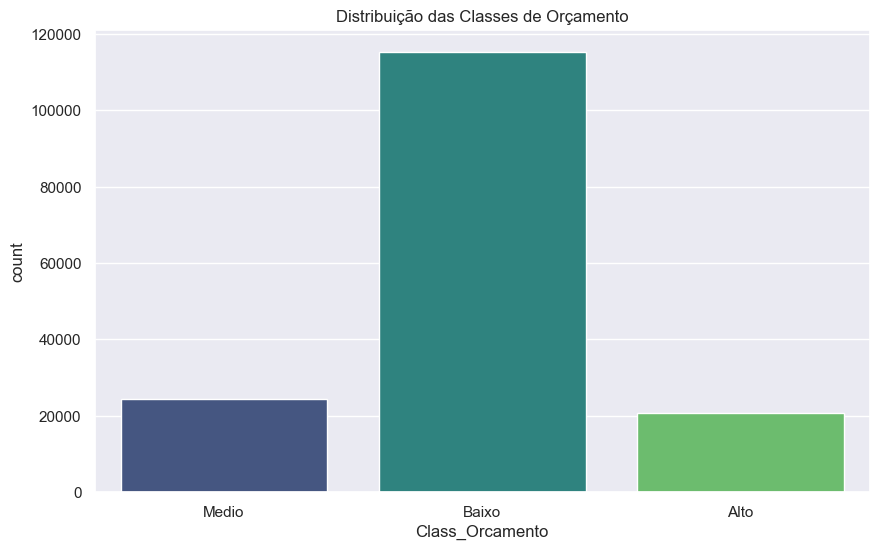

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class_Orcamento', data=gastos_diretos, palette='viridis')
plt.title('Distribuição das Classes de Orçamento')
plt.savefig('../resultados/distribuicao_classes.png', bbox_inches='tight')
plt.show()